In [1]:
import numpy as np
from IPython.display import Image

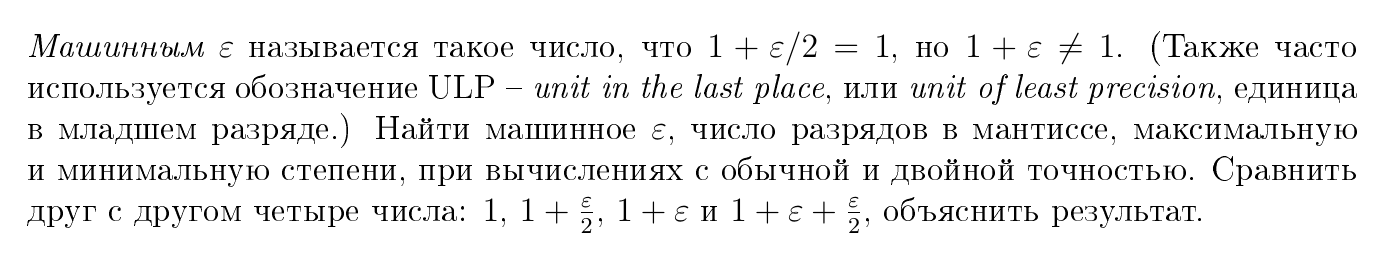

In [2]:
Image('task 1.png')

### Let's see into documentation

In [4]:
print("Single precision:")
print("\teps: ", np.finfo(np.float32).eps)
print("\tnmant: ", np.finfo(np.float32).nmant)
# maxexp - "The smallest positive power of the base (2) that causes overflow."
# So, we need maxexp-1
print("\tmaxexp: ", np.finfo(np.float32).maxexp-1)
print("\tminexp: ", np.finfo(np.float32).minexp)

print("Double precision:")
print("\teps: ", np.finfo(np.float64).eps)
print("\tnmant: ", np.finfo(np.float64).nmant)
print("\tmaxexp: ", np.finfo(np.float64).maxexp-1)
print("\tminexp: ", np.finfo(np.float64).minexp)

Single precision:
	eps:  1.1920929e-07
	nmant:  23
	maxexp:  127
	minexp:  -126
Double precision:
	eps:  2.220446049250313e-16
	nmant:  52
	maxexp:  1023
	minexp:  -1022


$\LARGE$
Machine $\LARGE\epsilon$ is minimal number (the power of 2) such that $\LARGE\epsilon + 1 \ne 1;$

$\LARGE2^{-(n+1)}=\frac{\epsilon}{2} $
$\LARGE=> 2^{-n}=\epsilon$

In [5]:
def getSingleEps():
    step = 0
    eps = np.float32(1.0)
    prev_eps = np.float32(0.0)

    while eps + np.float32(1.0) != np.float32(1.0):
        prev_eps = eps
        eps = np.float32(1/(2 ** step))
        step += 1
    return prev_eps, step-2

def getDoubleEps():
    step = 0
    eps = np.float64(1.0)
    prev_eps = np.float64(0.0)

    while eps + np.float64(1.0) != np.float64(1.0):
        prev_eps = eps
        eps = np.float64(1/(2 ** step))
        step += 1
    return prev_eps, step-2

In [6]:
single_eps, single_mant = getSingleEps()
double_eps, double_mant = getDoubleEps()

print("Single epsilon: ", single_eps, "; single nmant: ", single_mant)
print("Double epsilon: ", double_eps, "; double nmant: ", double_mant)

Single epsilon:  1.1920929e-07 ; single nmant:  23
Double epsilon:  2.220446049250313e-16 ; double nmant:  52


$\LARGE$
Denormalized number step is $\LARGE2^{-n}*2^{E_{min}}$, so the smallest power of to is $\LARGE2^{E_{min}-n}$

$\LARGE2^{-step}=2^{E_{min}-n}=>E_{min}=-(step-n)$

In [7]:
def getLargestSingle():
    num = np.float32(1.0)
    exp = 0

    while num != np.float32('inf'):
        num = np.float32(num*2)
        exp += 1

    return exp - 1


def getSmallestSingle():
    num = np.float32(1.0)
    exp = 0

    while num != np.float32(0.0):
        num = np.float32(num/2)
        exp += 1
    return -(exp - 1 - single_mant)


def getLargestDouble():
    num = np.float64(1.0)
    exp = 0

    while num != np.float64('inf'):
        num = np.float64(num*2)
        exp += 1
    return exp - 1


def getSmallestDouble():
    num = np.float64(1.0)
    exp = 0

    while num != np.float64(0.0):
        num = np.float64(num/2)
        exp += 1
    return -(exp - 1 - double_mant)

In [8]:
print("Single maxexp: ", getLargestSingle())
print("Single minexp: ", getSmallestSingle())

print("Double maxexp: ", getLargestDouble())
print("Double minexp: ", getSmallestDouble())

Single maxexp:  127
Single minexp:  -126
Double maxexp:  1023
Double minexp:  -1022


/tmp/ipykernel_26907/1384378499.py:27: RuntimeWarning: overflow encountered in double_scalars
  num = np.float64(num*2)


In [9]:
cmp32 = { '1' : np.float32(1.0), '1 + ε/2' : np.float32(1.0 + single_eps / 2),
         '1 + ε' : np.float32(1.0 + single_eps), '1 + ε + ε/2' : np.float32(1.0 + single_eps + single_eps / 2)}

cmp64 = { '1' : np.float64(1.0), '1 + ε/2' : np.float64(1.0 + double_eps / 2),
         '1 + ε' : np.float64(1.0 + double_eps), '1 + ε + ε/2' : np.float64(1.0 + double_eps + double_eps / 2)}

In [10]:
def compare(dict_):
    for i, (name_i, elem_i) in enumerate(dict_.items()):
        for j, (name_j, elem_j) in enumerate(dict_.items()):
            if i>=j:
                continue
            if elem_i < elem_j:
                print('%s < %s' % (name_i, name_j))
            if elem_i > elem_j:
                print('%s > %s' % (name_i, name_j))
            if elem_i==elem_j:
                print('%s == %s' % (name_i, name_j))

In [11]:
compare(cmp32)

1 == 1 + ε/2
1 < 1 + ε
1 < 1 + ε + ε/2
1 + ε/2 < 1 + ε
1 + ε/2 < 1 + ε + ε/2
1 + ε < 1 + ε + ε/2


In [12]:
compare(cmp64)

1 == 1 + ε/2
1 < 1 + ε
1 < 1 + ε + ε/2
1 + ε/2 < 1 + ε
1 + ε/2 < 1 + ε + ε/2
1 + ε < 1 + ε + ε/2


In [23]:
# for (_, elem) in cmp64.items():
#     print(elem)


arr = [np.float64(1.0) + double_eps/2,
       np.float64(1.0) + double_eps,
       np.float64(1.0) + double_eps/2 + double_eps,
       np.float64(1.0) + double_eps + double_eps/2,
       np.float64(1.0) + double_eps/2 + double_eps/2 + double_eps,
       np.float64(1.0) + double_eps + double_eps/2 + double_eps/2]

for elem in arr:
    print(elem)

print(double_eps)

1.0
1.0000000000000002
1.0000000000000002
1.0000000000000004
1.0000000000000002
1.0000000000000004
2.220446049250313e-16
